In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import scipy.stats as stats

## Load the data

In [2]:
df = pd.read_csv('revenue.csv')
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


## Data Cleaning

In [3]:
# check whether there is any na value
df.isna().sum()

USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

In [33]:
# check the uniqueness of user id
df['USER_ID'].nunique() == df['USER_ID'].shape[0]

False

In [35]:
# remove duplicated user id in both groups
duplicate_id = df.groupby('USER_ID')['VARIANT_NAME'].nunique() != 1
duplicate_id = duplicate_id[duplicate_id]

df = df[-df['USER_ID'].isin(duplicate_id.index)]
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
4,6174,variant,0.0
5,2380,variant,0.0
7,9168,control,0.0
9,7548,control,0.0


Text(0.5, 1.0, 'Before removing extreme values (outliers)')

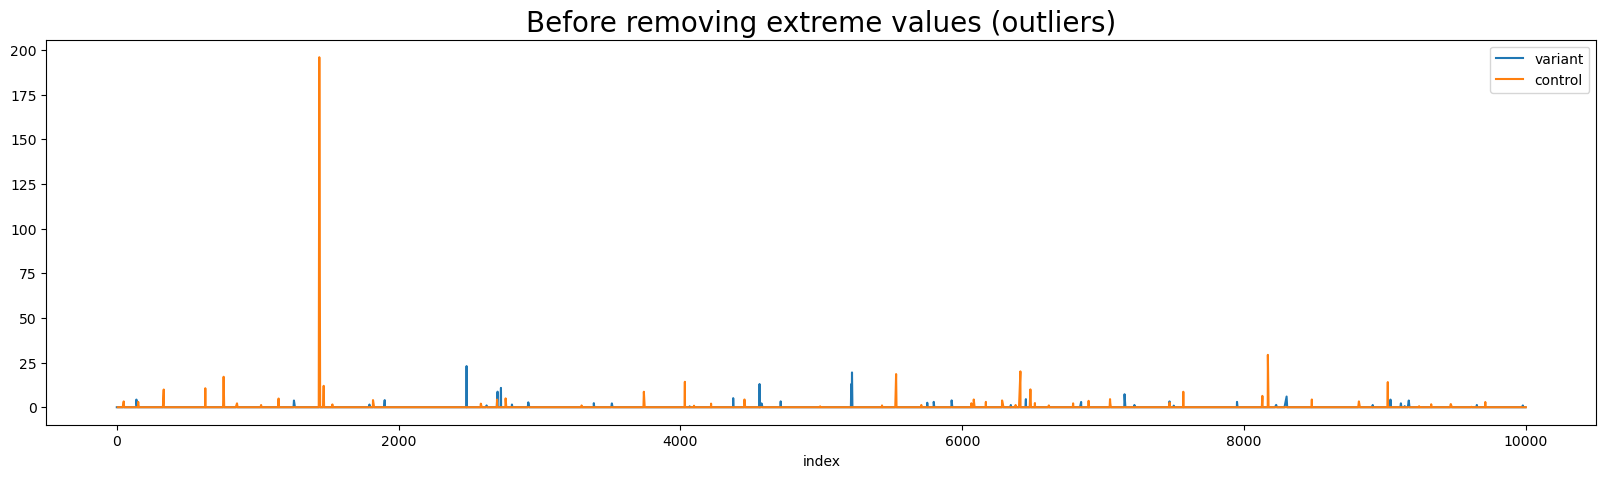

In [39]:
df_variant = df[df.VARIANT_NAME == 'variant']
df_control = df[df.VARIANT_NAME == 'control']

# check ouliers
df_variant.reset_index().set_index('index').REVENUE.plot(legend = True, label = 'variant', figsize = (20, 5))
df_control.reset_index().set_index('index').REVENUE.plot(legend = True, label = 'control', figsize = (20, 5))
plt.title('Before removing extreme values (outliers)', size = 20)

In [42]:
# define outlier thresholds
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit.round(), up_limit.round()


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

Text(0.5, 1.0, 'After removing extreme values (outliers)')

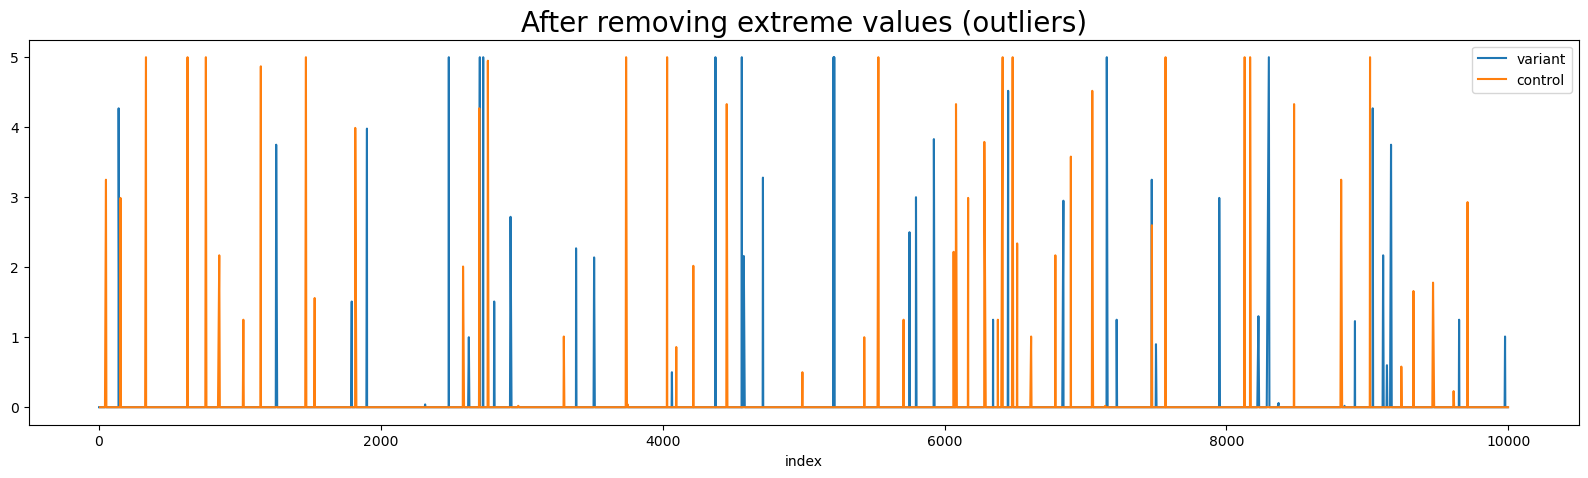

In [43]:
# remove the extreme value
replace_with_thresholds(df, 'REVENUE')
df_variant = df[df.VARIANT_NAME == 'variant']
df_control = df[df.VARIANT_NAME == 'control']

df_variant.reset_index().set_index('index').REVENUE.plot(legend = True, label = 'variant', figsize = (20, 5))
df_control.reset_index().set_index('index').REVENUE.plot(legend = True, label = 'control', figsize = (20, 5))
plt.title('After removing extreme values (outliers)', size = 20)

## Data Exploration

In [44]:
df.shape

(6069, 3)

In [45]:
df.describe()

,USER_ID,REVENUE
count,6069.000000,6069.000000
mean,4983.934586,0.045813
std,2898.152264,0.419515
min,2.000000,0.000000
25%,2472.000000,0.000000
50%,4951.000000,0.000000
75%,7501.000000,0.000000
max,9998.000000,5.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6069 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       6069 non-null   int64  
 1   VARIANT_NAME  6069 non-null   object 
 2   REVENUE       6069 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 189.7+ KB


In [47]:
df.nunique()

USER_ID         4782
VARIANT_NAME       2
REVENUE           50
dtype: int64

In [48]:
# print unique values for treatment and control groups
df.VARIANT_NAME.unique()

array(['variant', 'control'], dtype=object)

Text(0.5, 1.0, 'Distribution for treatment group')

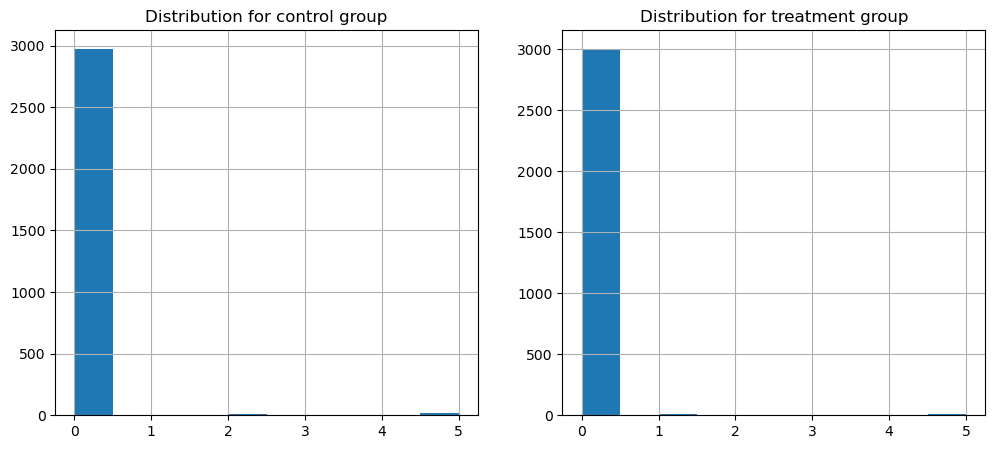

In [49]:
# check the distribution of control group and treatment group
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
plt.subplot(1, 2, 1)
df_control['REVENUE'].hist(ax = ax[0])
plt.title('Distribution for control group')

plt.subplot(1, 2, 2)
df_variant['REVENUE'].hist(ax = ax[1])
plt.title('Distribution for treatment group')